In [51]:
from gravhopper import Simulation, IC
from astropy import units as u
import matplotlib.pyplot as plt
from pynbody.analysis.profile import Profile
import numpy as np

In [67]:
sim = Simulation(dt=5e3*u.yr, eps=0.05*u.pc)
Plummer_IC = IC.Plummer(N=5000, b=1*u.pc, totmass=1e5*u.Msun)

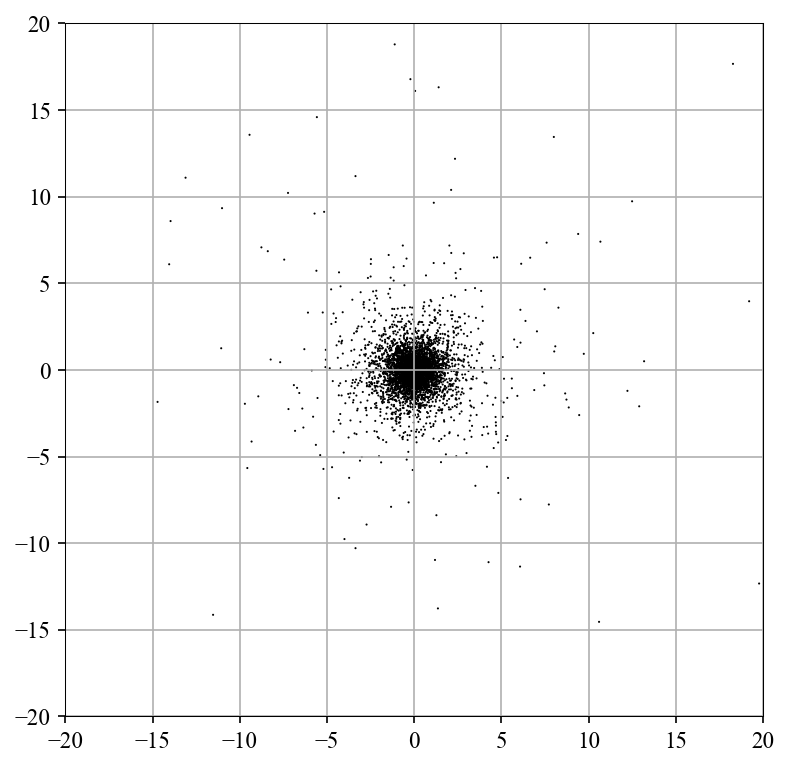

In [68]:
plt.figure(figsize=(6,6), dpi=150)
plt.scatter(*Plummer_IC['pos'].T[::2], s=1)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.grid(True)

(-80.0, 80.0)

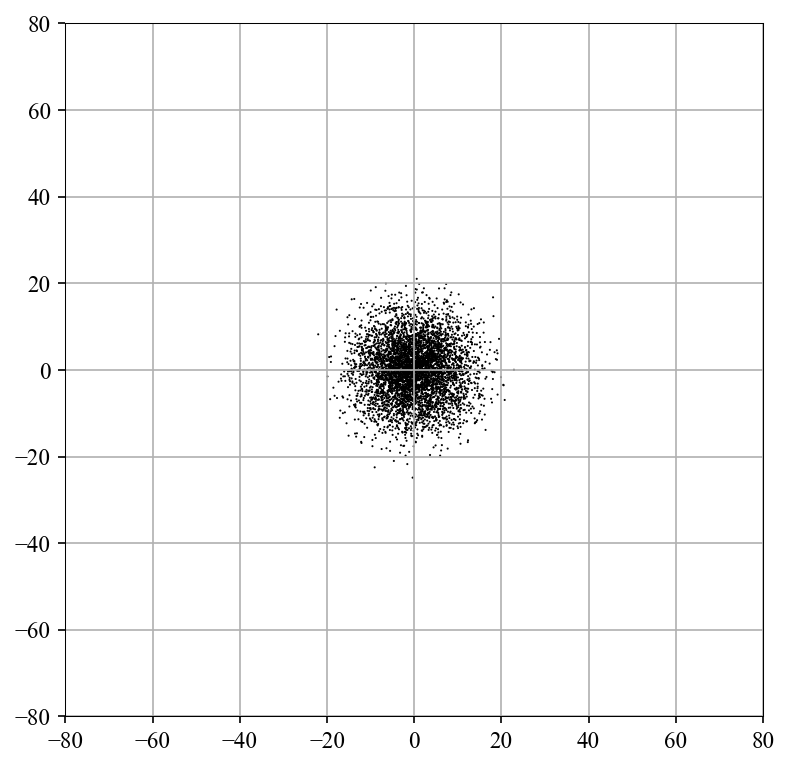

In [69]:
plt.figure(figsize=(6,6), dpi=150)
plt.scatter(*Plummer_IC['vel'].T[::2], s=1)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-80, 80)

In [70]:
Plummer_IC['mass']

<Quantity [20., 20., 20., ..., 20., 20., 20.] solMass>

In [71]:
sim.add_IC(Plummer_IC)
sim.run(400)

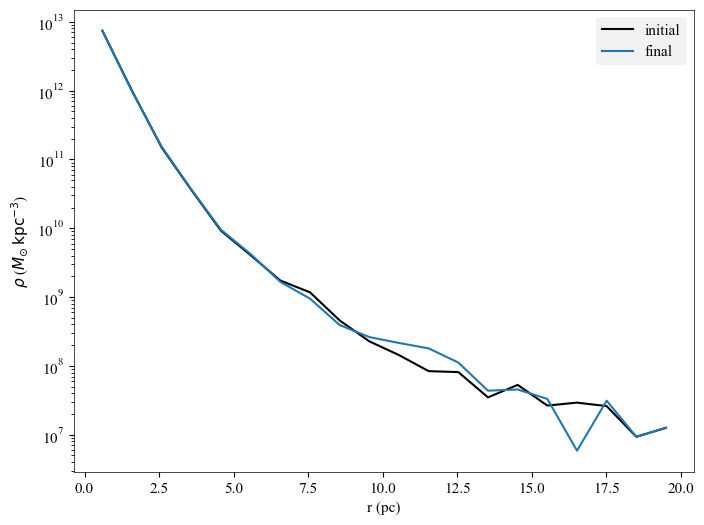

In [72]:
# Plot density profile before and after
s_IC = sim.pyn_snap(timestep=0)
s_final = sim.pyn_snap()
p_IC = Profile(s_IC, ndim=3, min=0.0001, max=0.02, nbins=20)
p_final = Profile(s_final, ndim=3, min=0.0001, max=0.02, nbins=20)
plt.plot(p_IC['rbins'].in_units('pc'), p_IC['density'], label='initial')
plt.plot(p_final['rbins'].in_units('pc'), p_final['density'], label='final')
plt.yscale('log')
plt.xlabel('r (pc)')
plt.ylabel(f'$\\rho$ (${p_IC["density"].units.latex()}$)')
plt.legend()

In [73]:
print(s_IC)

<SimSnap "<created>" len=5000>


In [74]:
sim.times

<Quantity [0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
           0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
           0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
           0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
           0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
           0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
           0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
           0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
           0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
           0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
           0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
           0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
           0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
           0.585, 0.59 , 0.595, 0.6  ,

In [75]:
sim.velocities

<Quantity [[[  5.50683615,   0.67644757,  -0.43899284],
            [ -8.10211301,  -1.61868987,  -0.80476008],
            [-11.09428985,   2.94914622,   7.10615316],
            ...,
            [ -1.18468136,   3.76672557,  -5.72445653],
            [-16.6685466 ,  -2.68627694,  -2.50310689],
            [ 11.30556113,   8.22395652,  -9.28026274]],

           [[  5.48825738,   0.84541857,  -0.41253883],
            [ -7.98942837,  -1.20185889,  -0.95967954],
            [-11.26170446,   3.52454547,   7.01723366],
            ...,
            [ -1.49356282,   3.44164709,  -6.41781649],
            [-16.30769126,  -2.69693672,  -3.02837767],
            [ 10.78158039,   8.16276894,  -9.78744985]],

           [[  5.46481731,   1.01374311,  -0.38616913],
            [ -7.87615085,  -0.80353824,  -1.10013714],
            [-11.37873022,   4.11109072,   6.8442537 ],
            ...,
            [ -1.81729462,   3.06327735,  -7.09705409],
            [-15.87871264,  -2.73410495,  -3.5086

In [76]:
1e6/5000

200.0

In [77]:
sim.masses

<Quantity [20., 20., 20., ..., 20., 20., 20.] solMass>

In [78]:
import plotly.graph_objects as go

# Get snapshots at regular intervals
n_frames = 20
frame_indices = np.linspace(0, len(sim.times) - 1, n_frames, dtype=int)

# Sample every nth particle
particle_step = 10

# Determine axis limits from all frames
all_coords = []
for idx in frame_indices:
    snap = sim.pyn_snap(timestep=idx)
    all_coords.extend(snap['x'][::particle_step])
    all_coords.extend(snap['y'][::particle_step])
    all_coords.extend(snap['z'][::particle_step])
max_range = max(abs(min(all_coords)), abs(max(all_coords))) * 0.3

# Create frames for animation
frames = []
for i, idx in enumerate(frame_indices):
    snap = sim.pyn_snap(timestep=idx)
    x = snap['x'][::particle_step]
    y = snap['y'][::particle_step]
    z = snap['z'][::particle_step]
    
    frames.append(go.Frame(
        data=[go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=2, color='black', opacity=0.6)
        )],
        name=str(i)
    ))

# Initial data
snap_init = sim.pyn_snap(timestep=0)
x0 = snap_init['x'][::particle_step]
y0 = snap_init['y'][::particle_step]
z0 = snap_init['z'][::particle_step]

# Create figure
fig = go.Figure(
    data=[go.Scatter3d(
        x=x0, y=y0, z=z0,
        mode='markers',
        marker=dict(size=2, color='black', opacity=0.6)
    )],
    layout=go.Layout(
        title='Plummer Sphere Evolution',
        scene=dict(
            xaxis_title='x (kpc)',
            yaxis_title='y (kpc)',
            zaxis_title='z (kpc)',
            xaxis=dict(range=[-max_range, max_range]),
            yaxis=dict(range=[-max_range, max_range]),
            zaxis=dict(range=[-max_range, max_range]),
            aspectmode='cube'
        ),
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(label='Play',
                     method='animate',
                     args=[None, dict(frame=dict(duration=100, redraw=True),
                                      fromcurrent=True, mode='immediate')]),
                dict(label='Pause',
                     method='animate',
                     args=[[None], dict(frame=dict(duration=0, redraw=False),
                                        mode='immediate')])
            ]
        )],
        sliders=[dict(
            steps=[dict(method='animate',
                        args=[[str(i)], dict(mode='immediate',
                                             frame=dict(duration=100, redraw=True))],
                        label=str(i)) for i in range(len(frames))],
            active=0,
            transition=dict(duration=0),
            currentvalue=dict(prefix='Frame: ')
        )]
    ),
    frames=frames
)

fig.show()

In [12]:
import astropy.units as u
import astropy.constants as c

In [13]:
c.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

G is in units $\left [\frac{L^3}{M t^2} \right ]$

if we set $G_{\text{in}} = 1$, then

$G_{\text{in}}  = G_{\text{SI}}\frac{M_{\text{unit}} t_{\text{unit}}^2}{L_{\text{unit}}^3}$

In [ ]:
# Assuming G_in = 1
G_in = 1
G_si = c.G
L_unit = 100 * u.pc
M_unit = 1e4 * u.Msun
t_unit = np.sqrt(G_in * (L_unit**3) / (M_unit * G_si)).to(u.Myr)

In [41]:
t_unit.to(u.Myr)

<Quantity 149.09601426 Myr>

In [43]:
input = 200 * u.km/u.s 
(input / L_unit).decompose()

<Quantity 6.48155858e-14 1 / s>

In [44]:
input.unit.physical_type == 'speed'

True